<a href="https://colab.research.google.com/github/karthickthangadurai/Guvi-Task-5/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import files
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fil1 = files.upload()

Saving takehome_user_engagement.csv to takehome_user_engagement.csv


In [3]:
fil2 = files.upload()

Saving takehome_users.csv to takehome_users.csv


In [74]:
engage = pd.read_csv("/content/takehome_user_engagement.csv")

In [75]:
users=pd.read_csv("/content/takehome_users.csv",encoding='ISO-8859-1')

In [76]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [77]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [78]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [79]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [80]:
datel=pd.DataFrame(dict(date_given=engage["time_stamp"].astype("datetime64")))

In [81]:
engage['day']=datel['date_given'].dt.dayofyear
engage['week']=datel['date_given'].dt.weekofyear
engage['month']=datel['date_given'].dt.month
engage['year']=datel['date_given'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [82]:
engage.head()

,time_stamp,user_id,visited,day,week,month,year
0,2014-04-22 03:53:30,1,1,112,17,4,2014
1,2013-11-15 03:45:04,2,1,319,46,11,2013
2,2013-11-29 03:45:04,2,1,333,48,11,2013
3,2013-12-09 03:45:04,2,1,343,50,12,2013
4,2013-12-25 03:45:04,2,1,359,52,12,2013


In [83]:
engage.shape

(207917, 7)

# ***The users who signed in more than 3 times in 3 separate days in a week at 2012***

In [84]:
y12=engage[engage.year==2012].groupby(['user_id',"week","month","year","visited"]).size()
year12=y12.to_frame(name="weekly_visited_12").reset_index()

In [85]:
y123=year12[year12.weekly_visited_12>=3].reset_index(drop=True)
y123.head(2)

,user_id,week,month,year,visited,weekly_visited_12
0,42,52,12,2012,1,4
1,69,27,7,2012,1,4


In [86]:
user_id12=year12[year12.weekly_visited_12>=3].user_id.unique()
user_id12[0:5]

array([ 42,  69, 197, 445, 509])

# ***The users who signed in more than 3 times in 3 separate days in a week at 2013***

In [87]:
y13=engage[engage.year==2013].groupby(['user_id',"week","month","year","visited"]).size()
year13=y13.to_frame(name="weekly_visited_13").reset_index()

In [88]:
y133=year13[year13.weekly_visited_13>=3].reset_index(drop=True)
y133.head(2)

,user_id,week,month,year,visited,weekly_visited_13
0,10,15,4,2013,1,3
1,10,17,4,2013,1,3


In [89]:
user_id13=year13[year13.weekly_visited_13 >= 3].user_id.unique()
user_id13[0:5]

array([10, 42, 43, 53, 63])

# ***The users who signed in more than 3 times in 3 separate days in a week at 2014***

In [90]:
y14=engage[engage.year==2014].groupby(['user_id',"week","month","year","visited"]).size()
year14=y14.to_frame(name="weekly_visited_14").reset_index()

In [91]:
y143=year14[year14.weekly_visited_14>=3].reset_index(drop=True)
y143.head(2)

,user_id,week,month,year,visited,weekly_visited_14
0,2,6,2,2014,1,3
1,10,1,1,2014,1,4


In [92]:
user_id14=year14[year14.weekly_visited_14 >= 3].user_id.unique()
user_id14[0:5]

array([ 2, 10, 20, 33, 42])

# ***Total No of predicted adopted users at years***

In [93]:
print("Total No Of Predicted Adopted Users at 2012 ---->",year12[year12.weekly_visited_12 >= 3].user_id.nunique())
print("Total No Of Predicted Adopted Users at 2013 ---->",year13[year13.weekly_visited_13 >= 3].user_id.nunique())
print("Total No Of Predicted Adopted Users at 2014 ---->",year14[year14.weekly_visited_14 >= 3].user_id.nunique())
user12=year12[year12.weekly_visited_12 >= 3].user_id.nunique()
user13=year13[year13.weekly_visited_13 >= 3].user_id.nunique()
user14=year14[year14.weekly_visited_14 >= 3].user_id.nunique()

Total No Of Predicted Adopted Users at 2012 ----> 265
Total No Of Predicted Adopted Users at 2013 ----> 1003
Total No Of Predicted Adopted Users at 2014 ----> 1216


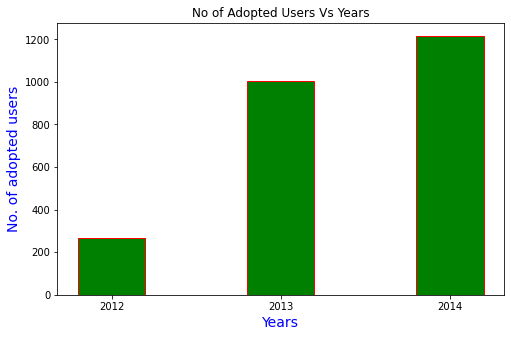

In [94]:
data = {'2012':user12, "2013":user13, '2014':user14}

years = list(data.keys())
count = list(data.values())
  
fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(years,count,color='g',width = 0.4,edgecolor='r')
 
plt.xlabel("Years",color='blue',fontsize=14)
plt.ylabel("No. of adopted users",color='blue',fontsize=14)
plt.title("No of Adopted Users Vs Years")
plt.show()

# ***Total No of Adopted Users***

In [95]:
# len(np.intersect1d(user_id12, user_id13))
adop_list=[]
adop_list.extend(user_id12)
adop_list.extend(user_id13)
adop_list.extend(user_id14)
print("Total No of Adopted User ---->", len(set(adop_list)))
adop_list=list(set(adop_list))
adop_list.sort()
print("Fisrt 10 Adopted User ID's ---->",adop_list[0:10])

Total No of Adopted User ----> 1416
Fisrt 10 Adopted User ID's ----> [2, 10, 20, 33, 42, 43, 53, 63, 69, 74]


# ***Creation Source vs Total No of Adopted Users***

In [96]:
print("Last Adopted User ID ", max(adop_list))
adop_list.append((users.shape[0]))

Last Adopted User ID  11988


In [97]:
user_array=np.bincount(adop_list)
user_array[-1]=0
user_array[0:3]

array([0, 0, 1])

In [98]:
users["adopted_user"]=user_array[1:]

In [99]:
users[["object_id","creation_source",'org_id',"adopted_user"]].head(2)

,object_id,creation_source,org_id,adopted_user
0,1,GUEST_INVITE,11,0
1,2,ORG_INVITE,1,1


In [100]:
create=users.groupby(["creation_source"]).adopted_user.sum().reset_index()
create.sort_values(by='adopted_user',inplace=True)

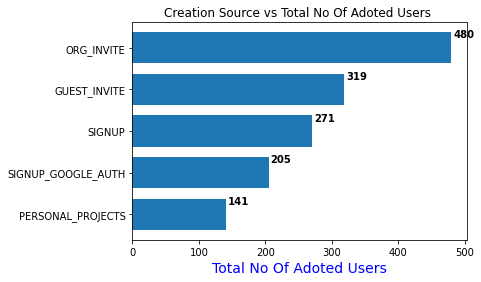

In [101]:
x = np.array(create['creation_source'])
y = np.array(create['adopted_user'])
fig, ax = plt.subplots()
width = 0.75

plt.barh(x, y, width)
plt.xlabel("Total No Of Adoted Users",color='blue',fontsize=14)
plt.title("Creation Source vs Total No Of Adoted Users ")
for i, v in enumerate(y):
    plt.text(v + 3, i + .25, str(v),
             fontweight = 'bold')
plt.savefig("bar.png")
plt.show()

*** Percentage of Total No Of Adopted Users For Each Creation Source***

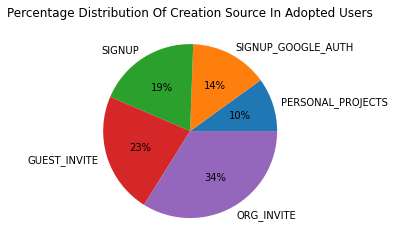

In [102]:
y = np.array(create['adopted_user'])
label = np.array(create['creation_source'])
plt.pie(y, labels =label, autopct='%1.0f%%')
plt.title("Percentage Distribution Of Creation Source In Adopted Users")
plt.show()